In [1]:
%matplotlib inline
from matplotlib import pyplot as pl
import numpy as np
pl.rcParams['figure.figsize'] = 10, 7.5
pl.rcParams['axes.grid'] = True
pl.gray()
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 720x540 with 0 Axes>

In [2]:
X, y = digits.data, digits.target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))
n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)


data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


In [3]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        pl.subplot(1, data.shape[0], (i + 1))
        pl.imshow(data[i].reshape(shape), interpolation=interpolation)
        pl.title(labels[i])
        pl.xticks(()), pl.yticks(())

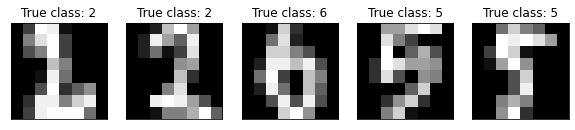

In [4]:
subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8, 8))

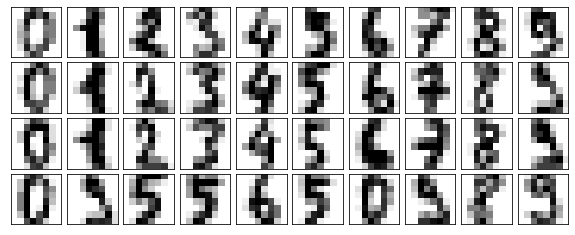

In [5]:
# PCA as noise filtering
# PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much 
# larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data 
# using just the largest subset of principal components, you should be preferentially keeping the signal and 
# throwing out the noise.

# Let's see how this looks with the digits data. First we will plot several of the input noise-free data
def plot_digits(data):
    fig, axes = pl.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

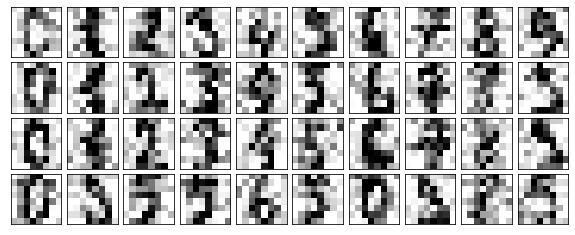

In [6]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [7]:
# Here 50% of the variance amounts to 12 principal components.
from sklearn.decomposition import PCA
pca = PCA(0.50,svd_solver='full').fit(noisy)
pca.n_components_

12

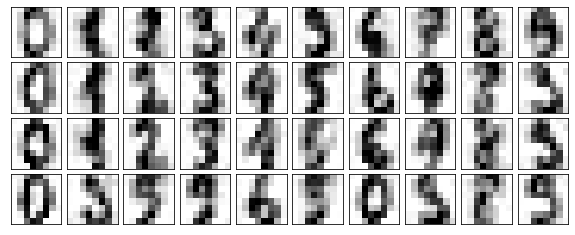

In [8]:
# Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)
# This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, 
# rather than training a classifier on very high-dimensional data, you might instead train the classifier on the 
# lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.
#print(filtered.shape)

Text(0, 0.5, 'cumulative explained variance')

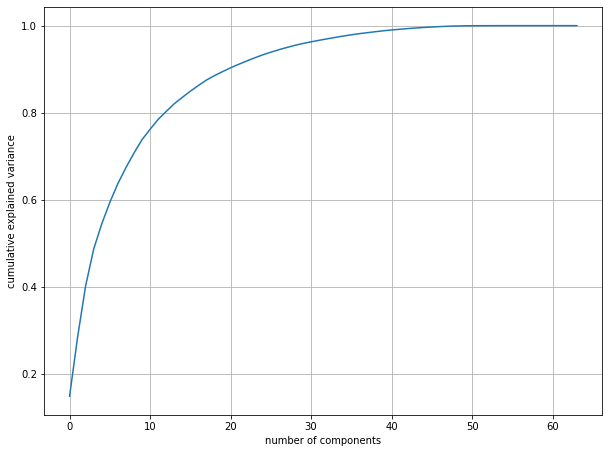

In [9]:
# This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components.
# For example, we see that with the digits the first 10 components contain approximately 75% of the variance, 
# while you need around 50 components to describe close to 100% of the variance.
# Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance)
# and that we'd need about 20 components to retain 90% of the variance. Looking at this plot for a high-dimensional
# dataset can help you understand the level of redundancy present in multiple observations.
pca = PCA().fit(digits.data)
pl.plot(np.cumsum(pca.explained_variance_ratio_))
pl.xlabel('number of components')
pl.ylabel('cumulative explained variance')

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='randomized')
%time X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(pca.components_)

CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 77.6 ms
(1797, 2)
[[ 1.88979697e-17 -1.73094646e-02 -2.23428823e-01 -1.35913315e-01
  -3.30323437e-02 -9.66340941e-02 -8.32943529e-03  2.26900112e-03
  -3.20516558e-04 -1.19308909e-01 -2.44451675e-01  1.48512727e-01
  -4.67319789e-02 -2.17740751e-01 -1.48136699e-02  4.47779526e-03
  -4.94137277e-05 -7.95419471e-02  8.33951552e-02  2.15915343e-01
  -1.72126801e-01 -1.63712086e-01  2.86444505e-02  4.23251798e-03
   9.85488203e-05  6.42319104e-02  2.54093318e-01 -3.56771024e-02
  -2.09462550e-01 -4.31311338e-02  5.13118635e-02  2.13422729e-04
   0.00000000e+00  1.59950888e-01  3.68690769e-01  1.64406815e-01
   8.52008018e-02  3.72982797e-02  2.15866842e-02  0.00000000e+00
   1.28865598e-03  1.06945299e-01  3.03067475e-01  2.47813034e-01
   2.09637314e-01  1.22325242e-02 -3.69458673e-02  1.61484989e-03
   6.93023558e-04 -8.35143464e-03 -5.58598744e-02  9.30533904e-02
   1.07387714e-01 -1.37734574e-01 -6.32879524e-02  9.61671479e-0

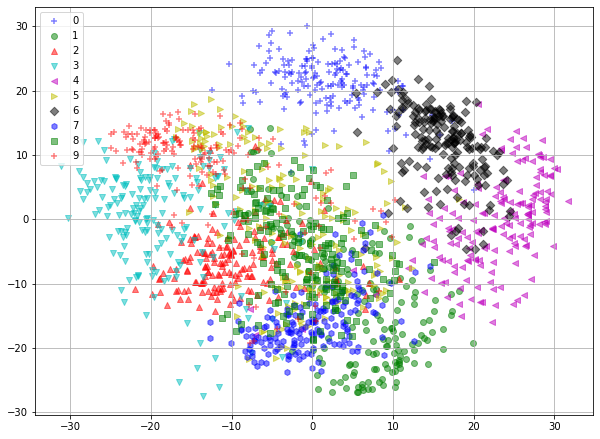

In [11]:
fig = pl.figure()
from itertools import cycle
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    pl.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
        c=c, marker=m, label=i, alpha=0.5)
_ = pl.legend(loc='best')

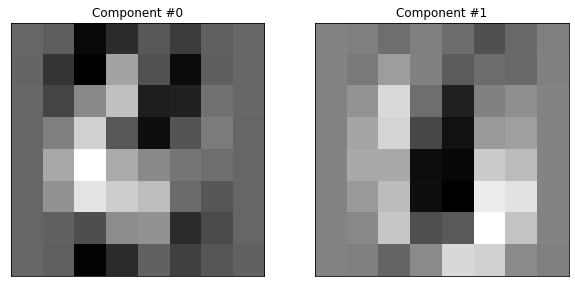

In [12]:
# We can observe that even in 2D, the groups of digits are quite well separated, especially the digit “0″ that is 
# very different from any other (the closest being “6″ as it often share most the left hand side pixels). We can 
# also observe that at least in 2D, there is quite a bit of overlap between the “1″, “2″ and “7″ digits. 
# To better understand the meaning of the “x” and “y” axes of this plot let us also visualize the values of the 
# first two principal components that are used to compute this projection
labels = ['Component #%d' % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8, 8))

In [13]:
pca = PCA(n_components=3)
%time X_pca = pca.fit_transform(X)
X_pca.shape

CPU times: user 346 ms, sys: 0 ns, total: 346 ms
Wall time: 30.2 ms


(1797, 3)

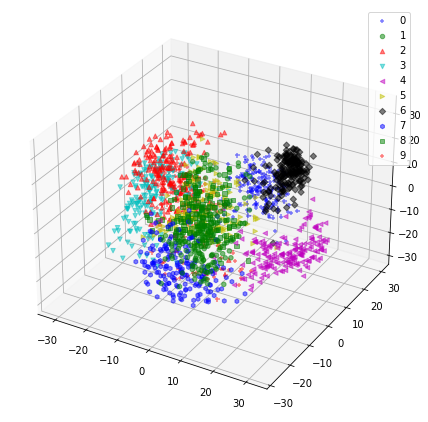

In [14]:
fig = pl.figure()
ax = fig.add_subplot(projection='3d')
from itertools import cycle
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2],
        c=c, marker=m, label=i, alpha=0.5)
_ = pl.legend(loc='best')

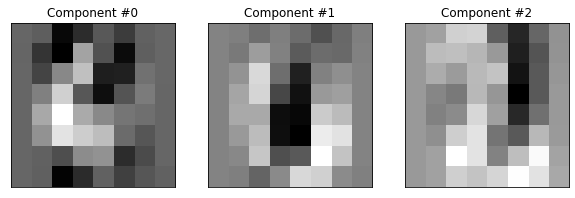

In [15]:
labels = ['Component #%d' % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8, 8))

In [16]:
# Overfitting is the problem of learning the training data by heart and being unable to generalize by making 
# correct predictions on data samples unseen while training. To illustrate this, let’s train a Support Vector 
# Machine naively on the digits dataset
from sklearn.svm import SVC
SVC(kernel='linear').fit(X, y).score(X, y)
#SVC(C=7).fit(X, y).score(X, y)
#SVC(kernel='rbf').fit(X, y).score(X, y)

1.0

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))
print("test data shape: %r, test target shape: %r"
      % (X_test.shape, y_test.shape))

train data shape: (1347, 64), train target shape: (1347,)
test data shape: (450, 64), test target shape: (450,)


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

In [19]:
train_score = svc.score(X_train, y_train) 
train_score

1.0

In [20]:
test_score = svc.score(X_test, y_test)
test_score


0.9711111111111111

In [21]:
svc_2 = SVC(kernel='rbf', C=100, gamma=0.001).fit(X_train, y_train)
svc_2.score(X_train, y_train)

1.0

In [22]:
svc_2.score(X_test, y_test)

0.9933333333333333

In [23]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
print(cv.get_n_splits(X))
for train, test in cv.split(X):
    print("train indices: {0}...".format(train[:10]))
    print("test indices: {0}...".format(test[:10]))

    svc = SVC(kernel="rbf", C=1, gamma=0.001).fit(X[train], y[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(X[train], y[train]), svc.score(X[test], y[test])))

10
train indices: [ 353    5   58 1349 1025  575 1074 1110 1745  689]...
test indices: [1081 1707  927  713  262  182  303  895  933 1266]...
train score: 0.999, test score: 0.989

train indices: [1336  608  977   22  526 1587 1130  569 1481  962]...
test indices: [1014  755 1633  117  181  501  948 1076   45  659]...
train score: 0.998, test score: 0.994

train indices: [ 451  409  911 1551  133  691 1306  111  852  825]...
test indices: [ 795  697  655  573  412  743  635  851 1466 1383]...
train score: 0.999, test score: 0.994

train indices: [1645 1321 1410 1602  617  823  667 1360 1138  154]...
test indices: [ 771  303 1751 1387  703  765 1543  970 1026  743]...
train score: 0.999, test score: 0.994

train indices: [ 385  619  272 1744 1592 1041 1632  945  336  211]...
test indices: [ 970  659  408 1537 1106  134 1293  664 1524  717]...
train score: 0.999, test score: 0.994

train indices: [ 118    3  854 1084  743  668 1782  319  887 1404]...
test indices: [ 137  285  507  188 17

In [24]:
from sklearn.model_selection import cross_val_score

svc = SVC(kernel="rbf", C=1, gamma=0.001)
cv = ShuffleSplit(n_splits=10, test_size=0.1,
    random_state=0)

test_scores = cross_val_score(svc, X, y, cv=cv, n_jobs=2)
test_scores

array([0.98888889, 0.99444444, 0.99444444, 0.99444444, 0.99444444,
       0.99444444, 0.98888889, 0.99444444, 0.98888889, 1.        ])

In [25]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))


In [26]:
print(mean_score(test_scores))

Mean score: 0.993 (+/-0.001)
